In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MaxPool2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_images = np.load('drive/MyDrive/Colab Notebooks/train_images_200.npy')
train_labels = np.load('drive/MyDrive/Colab Notebooks/train_labels_200.npy')
test_images = np.load('drive/MyDrive/Colab Notebooks/test_images_change5.npy')
test_labels = np.load('drive/MyDrive/Colab Notebooks/test_labels_change5.npy')

In [4]:
from sklearn.model_selection import train_test_split

train_images = np.array(train_images).reshape(-1, 96, 96, 3) / 255.0
test_images = np.array(test_images).reshape(-1, 96, 96, 3) / 255.0

# train_images, test_images, train_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.2)

train_labels_one_hot = np.eye(2)[train_labels]
test_labels_one_hot = np.eye(2)[test_labels]

In [5]:
model = Sequential()

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(96, 96, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) # change this line
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [6]:
import keras

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 3:
        lrate = 0.0005
    if epoch > 5:
        lrate = 0.0001
    if epoch > 10:
        lrate = 0.00005

    return lrate

checkpoint = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_acc')
# N번의 연속적인 epoch 동안 개선이 없을 때 학습이 중단되도록 함
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=30, restore_best_weights=True)

In [8]:
from keras.callbacks import LearningRateScheduler

history = model.fit(train_images, train_labels_one_hot, batch_size=32, epochs=100, validation_data=(test_images, test_labels_one_hot),
                    callbacks=[checkpoint, early_stopping, LearningRateScheduler(lr_schedule)])

Epoch 1/100
313/313 [==============================] - 27s 87ms/step - loss: 0.6945 - acc: 0.5056 - val_loss: 0.6932 - val_acc: 0.5000 - lr: 0.0010
Epoch 2/100
313/313 [==============================] - 27s 86ms/step - loss: 0.6932 - acc: 0.4954 - val_loss: 0.6932 - val_acc: 0.5000 - lr: 0.0010
Epoch 3/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6932 - acc: 0.5012 - val_loss: 0.6932 - val_acc: 0.5000 - lr: 0.0010
Epoch 4/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6934 - acc: 0.4951 - val_loss: 0.6931 - val_acc: 0.5000 - lr: 0.0010
Epoch 5/100
 49/313 [===>..........................] - ETA: 20s - loss: 0.6931 - acc: 0.5089

KeyboardInterrupt: ignored

In [12]:
from keras.models import load_model

model = load_model('best_cnn_model.h5')

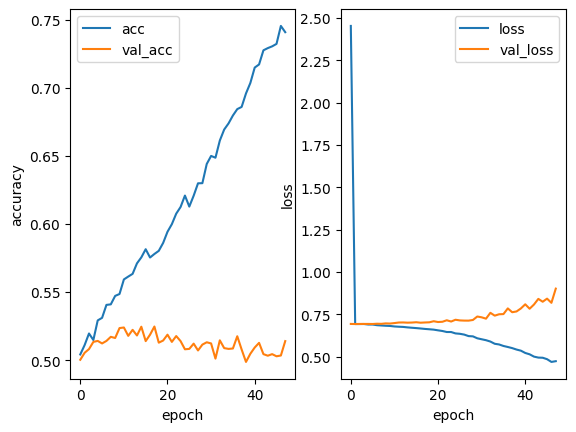

In [8]:
import matplotlib.pyplot as plt

plt.figure()

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot, verbose=2)

219/219 - 4s - loss: 0.7016 - acc: 0.5247 - 4s/epoch - 18ms/step


In [14]:
# 테스트 데이터셋에 대한 예측 생성
pred_probs = model.predict(test_images[:100])

print(pred_probs)

4/4 [==============================] - 0s 20ms/step
[[0.6829719  0.3170281 ]
 [0.49111658 0.5088834 ]
 [0.50021595 0.4997841 ]
 [0.51073813 0.48926193]
 [0.51073813 0.48926193]
 [0.5432751  0.45672488]
 [0.4274279  0.57257205]
 [0.39393023 0.60606974]
 [0.5199994  0.4800006 ]
 [0.5069975  0.49300247]
 [0.3720873  0.62791264]
 [0.67945236 0.32054764]
 [0.49766526 0.5023348 ]
 [0.5291937  0.47080633]
 [0.4859138  0.5140862 ]
 [0.7487989  0.2512011 ]
 [0.4584444  0.5415556 ]
 [0.4583527  0.5416473 ]
 [0.51073813 0.48926193]
 [0.520326   0.47967398]
 [0.47224694 0.52775306]
 [0.5096415  0.4903585 ]
 [0.3661417  0.63385826]
 [0.52381635 0.47618362]
 [0.47450006 0.52549994]
 [0.4466109  0.5533891 ]
 [0.60268056 0.3973195 ]
 [0.48688543 0.51311463]
 [0.51073813 0.48926193]
 [0.52192587 0.4780741 ]
 [0.48679075 0.5132093 ]
 [0.5080638  0.49193624]
 [0.4724357  0.5275643 ]
 [0.44484958 0.5551504 ]
 [0.4990398  0.5009602 ]
 [0.48255163 0.51744837]
 [0.34301606 0.6569839 ]
 [0.51073813 0.48926193

In [11]:
model.save('model.h5')